# Example of a notebok

In [1]:
import matplotlib
import matplotlib.pyplot as plt

In [2]:
matplotlib.interactive(False)

In [3]:
from sacr2df import convert_sacr_files_to_dataframes
from pathlib import Path

dfs = convert_sacr_files_to_dataframes(
    Path("testing/aesop.sacr"),
    Path("testing/caesar.sacr"),
    Path("testing/cicero.sacr"),
    Path("testing/pliny.sacr"),
)

Get all chains that are singletons:

In [4]:
dfs.text_chains[dfs.text_chains["size"] == 1].head()

,text_id,text_name,name,size,index_of_chain_in_the_text
2,0,aesop,M3,1,2
4,0,aesop,M14,1,4
6,0,aesop,M17,1,6
7,0,aesop,M24,1,7
8,0,aesop,M29,1,8


and the corresponding mentions:

In [5]:
dfs.text_mentions[dfs.text_mentions["is_singleton"] == True].head()

,chain_name,chain_id,sentence_id,paragraph_id,text_id,text_name,is_singleton,chain_size,start,end,...,index_of_mention_in_the_chain,index_of_paragraph_in_the_text,index_of_sentence_in_the_paragraph,index_of_sentence_in_the_text,index_of_mention_in_the_sentence,index_of_mention_in_the_paragraph,index_of_mention_in_the_text,function,head,partofspeech
19,M3,2,0,0,0,aesop,True,1,412,418,...,0,0,0,0,2,2,2,a adverbial,1,i noun with indefinite article
24,M14,4,1,0,0,aesop,True,1,1534,1545,...,0,0,1,1,8,13,13,a adverbial,1,n noun with determiner
28,M17,6,1,0,0,aesop,True,1,1807,1816,...,0,0,1,1,11,16,16,a adverbial,1,t noun without determiner
29,M24,7,3,0,0,aesop,True,1,2410,2424,...,0,0,3,3,2,23,23,a adverbial,2,d noun with definite article
30,M29,8,3,0,0,aesop,True,1,2904,2915,...,0,0,3,3,7,28,28,o object,1,d noun with definite article


Part of speech of chain first mentions:

In [6]:
dfs.text_mentions[
    dfs.text_mentions["index_of_mention_in_the_chain"] == 0
][["string", "chain_name", "partofspeech"]].head()

,string,chain_name,partofspeech
0,A Peasant,Peasant,i noun with indefinite article
11,an Eagle captured in a trap,Eagle,i noun with indefinite article
19,a trap,M3,i noun with indefinite article
20,a wall which was not safe,Wall,i noun with indefinite article
24,his talons,M14,n noun with determiner


In [7]:
parts_of_speech = dfs.text_mentions[
    (dfs.text_mentions["partofspeech"] != "")
    & (dfs.text_mentions["index_of_mention_in_the_chain"] == 0)
]["partofspeech"].value_counts()
parts_of_speech

partofspeech
d noun with definite article      31
t noun without determiner         27
n noun with determiner            25
i noun with indefinite article    17
a name                            17
r relative pronoun                 4
s personnal pronoun                1
Name: count, dtype: int64

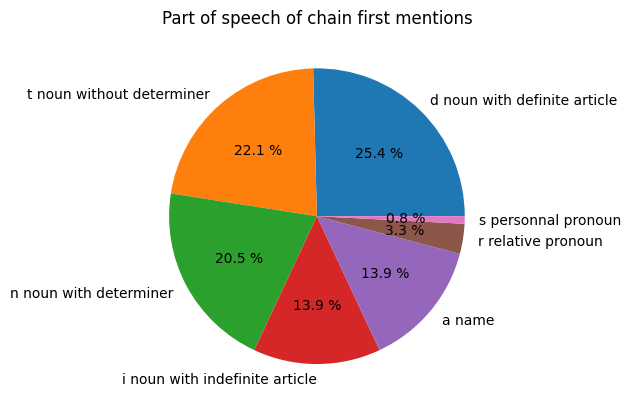

In [8]:
plt.pie(parts_of_speech.values, labels=parts_of_speech.index, autopct="%.1f %%")
plt.title("Part of speech of chain first mentions")
plt.show()

Show all the mentions of chains which have a pronoun as first mention:

In [9]:
pronouns = dfs.text_mentions[
    (dfs.text_mentions["partofspeech"].apply(lambda x: "pronoun" in x))
    & (dfs.text_mentions["index_of_mention_in_the_chain"] == 0)
]
pronouns

,chain_name,chain_id,sentence_id,paragraph_id,text_id,text_name,is_singleton,chain_size,start,end,...,index_of_mention_in_the_chain,index_of_paragraph_in_the_text,index_of_sentence_in_the_paragraph,index_of_sentence_in_the_text,index_of_mention_in_the_sentence,index_of_mention_in_the_paragraph,index_of_mention_in_the_text,function,head,partofspeech
124,M56,63,15,2,1,caesar,True,1,8401,8405,...,0,1,9,11,0,72,90,s subject,0,s personnal pronoun
216,M14,111,22,6,3,pliny,False,2,3017,3447,...,0,1,1,2,9,18,29,o object,0,r relative pronoun
219,M15,113,22,6,3,pliny,True,1,3319,3343,...,0,1,1,2,12,21,32,o object,0,r relative pronoun
220,M11,114,22,6,3,pliny,True,1,3426,3447,...,0,1,1,2,13,22,33,o object,0,r relative pronoun
221,M17,115,22,6,3,pliny,False,2,3541,3654,...,0,1,1,2,14,23,34,o object,0,r relative pronoun


In [10]:
for _, pronoun in pronouns.iterrows():
    chain = " | ".join(dfs.text_mentions[dfs.text_mentions["chain_id"] == pronoun["chain_id"]]["string"])
    print(chain)

This
those blessed to whom, by favour of the gods, it has been granted either to do what is worth writing of, or to write what is worth reading | whom
what is worth writing of
what is worth reading
those on whom both gifts have been conferred | whom


Length of sentences, by text

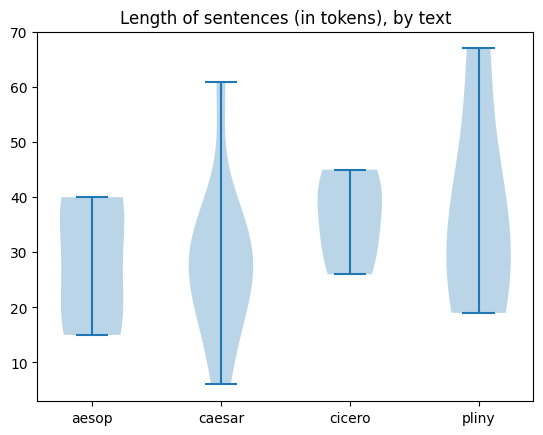

In [11]:
text_names, lengths = list(zip(*list(dfs.sentences.groupby("text_name")["token_count"])))

plt.violinplot(lengths)
plt.xticks([i for i in range(1, len(text_names)+1)], labels=text_names)
plt.title("Length of sentences (in tokens), by text")
plt.show()

Join as in SQL, for example to add text metadata (here the type of work) to each mention:

In [13]:
mentions = dfs.text_mentions[dfs.text_mentions["function"] != ""]
joined = mentions.join(dfs.texts, on="text_id", lsuffix="_mentions")
joined = joined[["chain_name", "function", "work"]]
joined

,chain_name,function,work
0,Peasant,s subject,literature
1,Peasant,o object,literature
2,Peasant,o object,literature
3,Peasant,o object,literature
4,Peasant,a adverbial,literature
...,...,...,...
224,M18,m noun modifier,science
226,M9,m noun modifier,science
227,M20,o object,science
228,M21,a adverbial,science


In [14]:
import pandas as pd
pt = joined[["function","work"]].pivot_table(
    index="function", columns="work", aggfunc=pd.Series.count
)
pt

work,literature,politics,science
function,,,
a adverbial,16.0,64.0,12.0
m noun modifier,NaN,52.0,36.0
o object,20.0,118.0,36.0
s subject,20.0,52.0,12.0
t other,6.0,10.0,4.0


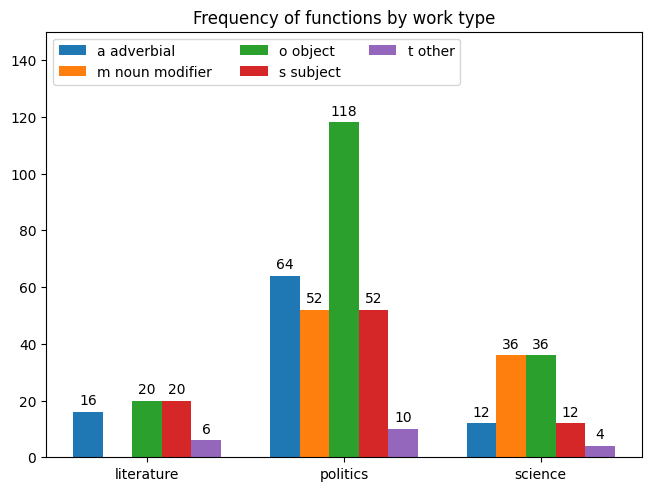

In [15]:
import numpy as np

works = pt.columns
functions = pt.T.to_dict("list")

x = np.arange(len(works))
width = 0.15
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for function, count in functions.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, count, width, label=function)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_title('Frequency of functions by work type')
ax.set_xticks(x + width*2, works)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 150)

plt.show()